In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

In [2]:
filepath_1 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgDJF_400BCE.nc")
filepath_2 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgMAM_400BCE.nc")
filepath_3 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgJJA_400BCE.nc")
filepath_4 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgSON_400BCE.nc")

min_lat = -30
max_lat = 30
min_lon = 30
max_lon = 120

test_1 = xr.open_dataset(filepath_1).sel(time=slice(-2,0),lon=slice(min_lon, max_lon), lat=slice(min_lat,max_lat))
test_1 = test_1*86400000

test_2 = xr.open_dataset(filepath_2).sel(time=slice(-2,0),lon=slice(min_lon, max_lon), lat=slice(min_lat,max_lat))
test_2 = test_2*86400000

test_3 = xr.open_dataset(filepath_3).sel(time=slice(-2,0),lon=slice(min_lon, max_lon), lat=slice(min_lat,max_lat))*86400000
test_4 = xr.open_dataset(filepath_4).sel(time=slice(-2,0),lon=slice(min_lon, max_lon), lat=slice(min_lat,max_lat))*86400000

test_1

<xarray.Dataset>
Dimensions:  (lat: 16, lon: 25, time: 201)
Coordinates:
  * lat      (lat) float64 -27.83 -24.12 -20.41 -16.7 ... 16.7 20.41 24.12 27.83
  * lon      (lon) float64 30.0 33.75 37.5 41.25 ... 108.8 112.5 116.2 120.0
  * time     (time) float64 -2.0 -1.99 -1.98 -1.97 ... -0.03 -0.02 -0.01 0.0
Data variables:
    PRECT    (time, lat, lon) float64 6.803 4.57 2.803 ... 1.816 2.629 4.976
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sun Oct 27 09:07:55 2013: ncatted -a cell_meth...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3

In [3]:
filepath = ("/volumes/TOSHIBA/MIT/precip.mon.mean.nc")

ds = xr.open_dataset(filepath).sel(time=slice("1979-01-01", "2024-05-01"),lon=slice(min_lon, max_lon), lat=slice(min_lat,max_lat))
ds

<xarray.Dataset>
Dimensions:    (lat: 24, lon: 36, time: 545, nv: 2)
Coordinates:
  * lat        (lat) float32 -28.75 -26.25 -23.75 -21.25 ... 23.75 26.25 28.75
  * lon        (lon) float32 31.25 33.75 36.25 38.75 ... 111.2 113.8 116.2 118.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-05-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2024/04 through latest.

In [4]:
ds = ds.set_coords('time_bnds')

In [5]:
def seasonal_means(ds):
    month_length = ds.time.dt.days_in_month
    seasonal_sst = ((ds*month_length).resample(time = 'QS-DEC').sum() / 
                month_length.resample(time ='QS-DEC').sum())
    mam = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='MAM')
    jja = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='JJA')
    son = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='SON')
    djf = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='DJF')
    
    annual = ds.groupby('time.year').mean(dim='time')
    
    return mam, jja, son, djf, annual

In [6]:
mam, jja, son, djf, annual = seasonal_means(ds)

/var/folders/8f/8f6cypmn48x3j6q963chv0w00000gn/T/ipykernel_26087/2750087950.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(421, projection=ccrs.PlateCarree())
/var/folders/8f/8f6cypmn48x3j6q963chv0w00000gn/T/ipykernel_26087/2750087950.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2=plt.subplot(423, projection=ccrs.PlateCarree())
/var/folders/8f/8f6cypmn48x3j6q963chv0w00000gn/T/ipykernel_26087/2750087950.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3=plt.subplot(425, projection=ccrs.PlateCarree())
/var/folders/8f/8f6cypmn48x3j6q963chv0w00000gn/T/ipykernel_26087/275008795

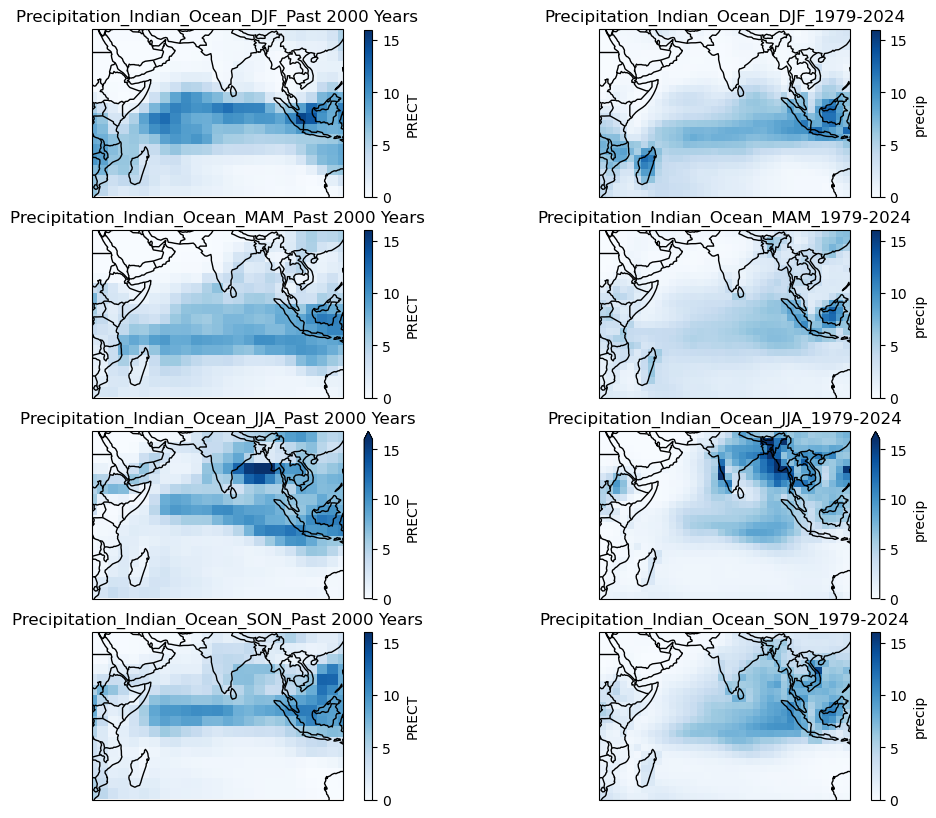

In [7]:
domain = [min_lon, max_lon, min_lat, max_lat] # for just Indian(longitude start, longitude end, latitude start, latitude end)

fig, axes = plt.subplots(nrows = 4,ncols = 2, figsize=(12,10))

#Row 1, Col.1
ax1=plt.subplot(421, projection=ccrs.PlateCarree())

ax1.add_feature(cfeature.COASTLINE, zorder=2)
ax1.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax1.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
#ax1.set_yticks(np.arange(-90, 90, 10), crs=ccrs.PlateCarree())

# making map with data
im_1 = test_1.PRECT.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_DJF_Past 2000 Years', fontsize=12) 
ax1.set_extent(domain, crs=ccrs.PlateCarree())


#Row 2, Col.1
ax2=plt.subplot(423, projection=ccrs.PlateCarree())

ax2.add_feature(cfeature.COASTLINE, zorder=2)
ax2.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax2.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
#ax2.set_yticks(np.arange(-90, 90, 10), crs=ccrs.PlateCarree())

# making map with data
im_2 = test_2.PRECT.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_MAM_Past 2000 Years', fontsize=12) 
ax2.set_extent(domain, crs=ccrs.PlateCarree())


#Row 3, Col.1
ax3=plt.subplot(425, projection=ccrs.PlateCarree())

ax3.add_feature(cfeature.COASTLINE, zorder=2)
ax3.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax3.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
#ax3.set_yticks(np.arange(-90, 90, 10), crs=ccrs.PlateCarree())

# making map with data
im_3 = test_3.PRECT.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_JJA_Past 2000 Years', fontsize=12) 
ax3.set_extent(domain, crs=ccrs.PlateCarree())


#Row 4, Col.1
ax4=plt.subplot(427, projection=ccrs.PlateCarree())

ax4.add_feature(cfeature.COASTLINE, zorder=2)
ax4.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax4.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
#ax4.set_yticks(np.arange(-90, 90, 10), crs=ccrs.PlateCarree())

# making map with data
im_4 = test_4.PRECT.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_SON_Past 2000 Years', fontsize= 12) 
ax4.set_extent(domain, crs=ccrs.PlateCarree())

#Observational Data
#Row 1, Col.2
ax5=plt.subplot(422, projection=ccrs.PlateCarree())

ax5.add_feature(cfeature.COASTLINE, zorder=2)
ax5.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax5.set_xticks(np.arange(-180, 180, 5), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(-90, 90, 5), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter()
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)

# making map with data
im = djf.precip.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_DJF_1979-2024', fontsize=12) 
ax1.set_extent(domain, crs=ccrs.PlateCarree())


#Row 2, Col.2
ax6=plt.subplot(424, projection=ccrs.PlateCarree())

ax6.add_feature(cfeature.COASTLINE, zorder=2)
ax6.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax5.set_xticks(np.arange(-180, 180, 5), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(-90, 90, 5), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter()
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)

# making map with data
im = mam.precip.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_MAM_1979-2024', fontsize=12) 
ax1.set_extent(domain, crs=ccrs.PlateCarree())


#Row 2, Col.6
ax7=plt.subplot(426, projection=ccrs.PlateCarree())

ax7.add_feature(cfeature.COASTLINE, zorder=2)
ax7.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax5.set_xticks(np.arange(-180, 180, 5), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(-90, 90, 5), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter()
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)

# making map with data
im = jja.precip.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_JJA_1979-2024', fontsize=12) 
ax7.set_extent(domain, crs=ccrs.PlateCarree())


#Row 2, Col.8
ax8=plt.subplot(428, projection=ccrs.PlateCarree())

ax8.add_feature(cfeature.COASTLINE, zorder=2)
ax8.add_feature(cfeature.BORDERS, zorder=2)

# rest of this is for tick formatting
#ax5.set_xticks(np.arange(-180, 180, 5), crs=ccrs.PlateCarree())
#ax5.set_yticks(np.arange(-90, 90, 5), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter()
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)

# making map with data
im = son.precip.mean(dim='time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=16, cmap='Blues')

plt.title('Precipitation_Indian_Ocean_SON_1979-2024', fontsize=12) 
ax8.set_extent(domain, crs=ccrs.PlateCarree())